<a href="https://colab.research.google.com/github/dewi31/deep_learning/blob/master/Klasifikasi_Penyakit_Daun_Jagung.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets list

ref                                                           title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
alphiree/cardiovascular-diseases-risk-prediction-dataset      Cardiovascular Diseases Risk Prediction Dataset       5MB  2023-07-03 12:12:19           2564        112  1.0              
nelgiriyewithana/countries-of-the-world-2023                  Global Country Information Dataset 2023              23KB  2023-07-08 20:37:33           1485         62  1.0              
iamsouravbanerjee/data-science-salaries-2023                  Data Science Salaries                                32KB  2023-07-07 12:53:23           1444         57  1.0              
shuvammandal121/9000-companies-and-its-ratings-dataset        9000 com

In [18]:
# Mendownload dataset dari kaggle
!kaggle datasets download -d 'smaranjitghose/corn-or-maize-leaf-disease-dataset'

100% 161M/161M [00:05<00:00, 42.6MB/s]
100% 161M/161M [00:05<00:00, 28.1MB/s]


In [19]:
# Mengekstrak file zip
!pip install patool
import patoolib
patoolib.extract_archive('/content/corn-or-maize-leaf-disease-dataset.zip')

patool: Extracting /content/corn-or-maize-leaf-disease-dataset.zip ...
patool: running /usr/bin/7z x -o./Unpack_uh5s6h4j -- /content/corn-or-maize-leaf-disease-dataset.zip
patool: ... /content/corn-or-maize-leaf-disease-dataset.zip extracted to `data'.


'data'

In [29]:
# Split folder menggunakan library split folder
!pip install split-folders
import splitfolders

folder = '/content/data'
splitfolders.ratio(folder, output = '/content/corn', seed = 42, ratio = (.9,.1))

Copying files: 4188 files [00:01, 3419.79 files/s]


In [26]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import RMSprop,Adam
from keras.layers import Flatten,Dense, Conv2D, MaxPooling2D, BatchNormalization, Dropout
from keras.models import Model, Sequential
from keras.applications import ResNet50

In [37]:
train_dir = '/content/corn/train'
validation_dir = '/content/corn/val'

train_datagen = ImageDataGenerator(
        rescale=1./255.,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True
        ,width_shift_range=0.2
        ,height_shift_range=0.3
        ,rotation_range=20
        ,fill_mode="nearest"
    )

train_generator= train_datagen.flow_from_directory(directory=train_dir,
                                                      batch_size=32,
                                                      class_mode='categorical',
                                                      target_size=(360, 360))
validation_datagen = ImageDataGenerator(rescale=1./255.)
validation_generator = validation_datagen.flow_from_directory(directory=validation_dir,
                                                                  batch_size=20,
                                                                  class_mode='categorical',
                                                                  target_size=(360, 360))
label_map = (train_generator.class_indices)
print(label_map)

Found 3767 images belonging to 4 classes.
Found 840 images belonging to 4 classes.
{'Blight': 0, 'Common_Rust': 1, 'Gray_Leaf_Spot': 2, 'Healthy': 3}


In [31]:
model = Sequential()
model.add(Conv2D(32,(3,3), activation = 'relu', input_shape = (360,360,3)))
model.add(MaxPooling2D(3,3))

model.add(Conv2D(40,(3,3), activation = 'relu'))
model.add(MaxPooling2D(3,3))


model.add(Flatten())
model.add(Dense(80, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(20, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(4, activation='softmax'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 358, 358, 32)      896       
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 119, 119, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 117, 117, 40)      11560     
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 39, 39, 40)       0         
 g2D)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 60840)             0         
                                                                 
 dense_12 (Dense)            (None, 80)               

In [32]:
model.compile(loss = 'categorical_crossentropy', optimizer= 'adam', metrics = ['accuracy'])
model.fit(train_generator, epochs = 20,
          validation_data = validation_generator,
          steps_per_epoch=10)

Epoch 1/20
10/10 [==============================] - 102s 10s/step - loss: 1.8350 - accuracy: 0.2781 - val_loss: 1.3664 - val_accuracy: 0.2798
Epoch 2/20
10/10 [==============================] - 97s 10s/step - loss: 1.3229 - accuracy: 0.3730 - val_loss: 1.1634 - val_accuracy: 0.6143
Epoch 3/20
10/10 [==============================] - 98s 10s/step - loss: 1.1855 - accuracy: 0.4938 - val_loss: 0.9247 - val_accuracy: 0.5810
Epoch 4/20
10/10 [==============================] - 141s 15s/step - loss: 1.0785 - accuracy: 0.5594 - val_loss: 0.8976 - val_accuracy: 0.7131
Epoch 5/20
10/10 [==============================] - 109s 11s/step - loss: 0.9064 - accuracy: 0.6187 - val_loss: 0.7160 - val_accuracy: 0.7238
Epoch 6/20
10/10 [==============================] - 102s 10s/step - loss: 0.8304 - accuracy: 0.6687 - val_loss: 0.5901 - val_accuracy: 0.8071
Epoch 7/20
10/10 [==============================] - 140s 15s/step - loss: 0.7868 - accuracy: 0.6969 - val_loss: 0.6565 - val_accuracy: 0.7607
Epoch 8/

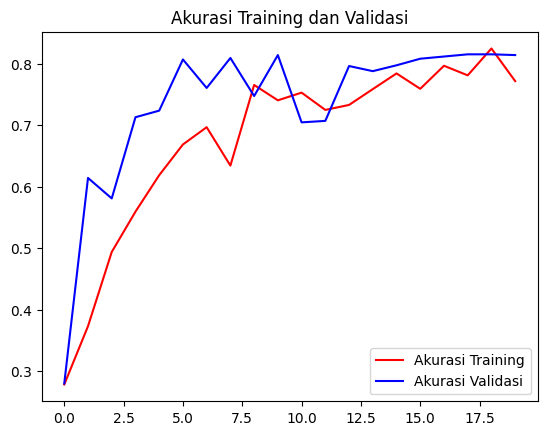

<Figure size 640x480 with 0 Axes>

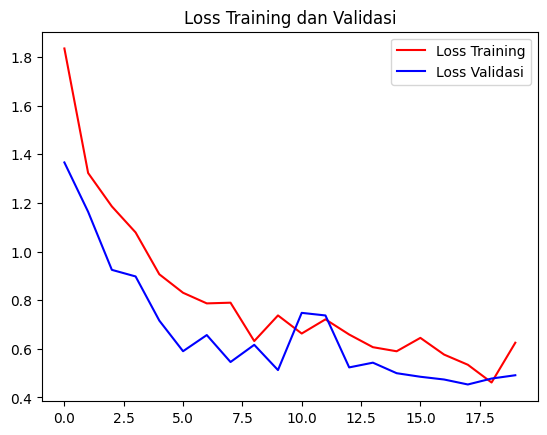

<Figure size 640x480 with 0 Axes>

In [33]:
import matplotlib.pyplot as plt
acc = model.history.history['accuracy']
val_acc = model.history.history['val_accuracy']
loss = model.history.history['loss']
val_loss = model.history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Akurasi Training')
plt.plot(epochs, val_acc, 'b', label='Akurasi Validasi')
plt.title('Akurasi Training dan Validasi')
plt.legend(loc=0)
plt.figure()
plt.show()

plt.plot(epochs, loss, 'r', label='Loss Training')
plt.plot(epochs, val_loss, 'b', label='Loss Validasi')
plt.title('Loss Training dan Validasi')
plt.legend(loc=0)
plt.figure()
plt.show()

In [34]:
# Save model
model.save("model_klasifikasi.h5")

In [35]:
# Load model dengan akurasi terbaik
new_model = tf.keras.models.load_model('/content/model_klasifikasi.h5')
new_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 358, 358, 32)      896       
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 119, 119, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 117, 117, 40)      11560     
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 39, 39, 40)       0         
 g2D)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 60840)             0         
                                                                 
 dense_12 (Dense)            (None, 80)               

Saving Corn_Health (10).jpg to Corn_Health (10) (6).jpg
1/1 [==============================] - 0s 54ms/step
[[0. 0. 0. 1.]]


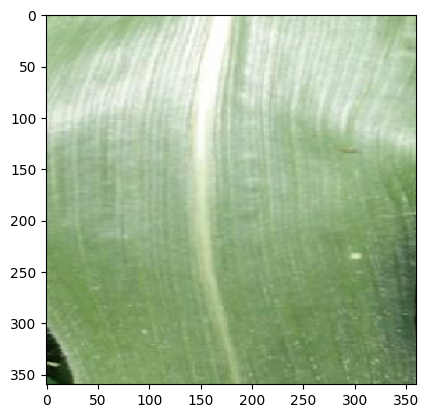

In [49]:
# Melakukan pengujian dengan model terbaik
import numpy as np
from google.colab import files
from keras.utils import load_img, img_to_array

uploaded = files.upload()

for fn in uploaded.keys():

  path = fn
  img = load_img(path, target_size=(360, 360))
  imgplot = plt.imshow(img)
  x = img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = new_model.predict(images, batch_size=10)
  print(classes)
